# Problema 1

### a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def numconvorder(h, err):
    alpha = np.log(err[:-1,:]/err[1:,:])/np.log(2)
    C = err[:-1,:] / (h[:-1,:] ** alpha)
    return alpha, C

### b)

In [2]:
def numdiff_1(f, x, k):
    h = np.array([[1/2**i] for i in range(k)])
    Phi1 = np.array([[ (f(x+2**(-i))-f(x))/2**(-i)] for i in range(k)])
    return h, Phi1

def numdiff_2(f, x, k):
    h = np.array([[1/2**i] for i in range(k)])
    Phi2 = np.array([[ (f(x+2**(-i))-f(x-2**(-i)))/2**(1-i)] for i in range(k)])
    return h, Phi2

### c)

In [3]:
x = 1
k = 16
f = lambda x: np.exp(x)
h_1, Phi1 = numdiff_1(f, x, k)
h_2, Phi2 = numdiff_2(f, x, k)
err_1 = np.abs(Phi1-np.exp(1))
err_2 = np.abs(Phi2-np.exp(1))

alpha_1, C_1 = numconvorder(h_1, err_1)
alpha_2, C_2 = numconvorder(h_2, err_2)

alpha_1r = round(alpha_1[-1][0], 0)
alpha_2r = round(alpha_2[-1][0], 0)

print(f"Orden de convergencia para Phi1: {alpha_1r}\nOrden de convergencia para Phi2: {alpha_2r}")

Orden de convergencia para Phi1: 1.0
Orden de convergencia para Phi2: 2.0


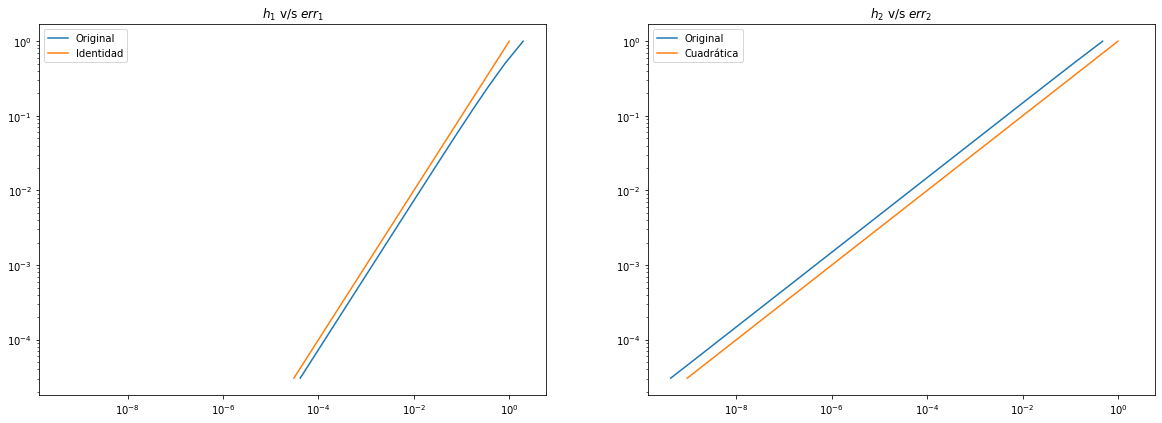

In [44]:
X_1 = np.linspace(min(h_1**alpha_1r), max(h_1**alpha_1r), 15)
X_2 = np.linspace(min(h_1**alpha_2r), max(h_1**alpha_2r), 15)

f_1 = lambda x: x
f_2 = lambda x: x**0.5

fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharex = ax1, sharey = ax1)
ax1.loglog(err_1, h_1)
ax1.loglog(X_1, f_1(X_1), label = "Identidad")
ax2.loglog(err_2, h_2)
ax2.loglog(X_2, f_2(X_2), label = "Cuadrática")
ax1.set_title("$h_1$ v/s $err_1$")
ax2.set_title("$h_2$ v/s $err_2$")
ax1.legend(["Original", "Identidad"])
ax2.legend(["Original", "Cuadrática"])
plt.show()

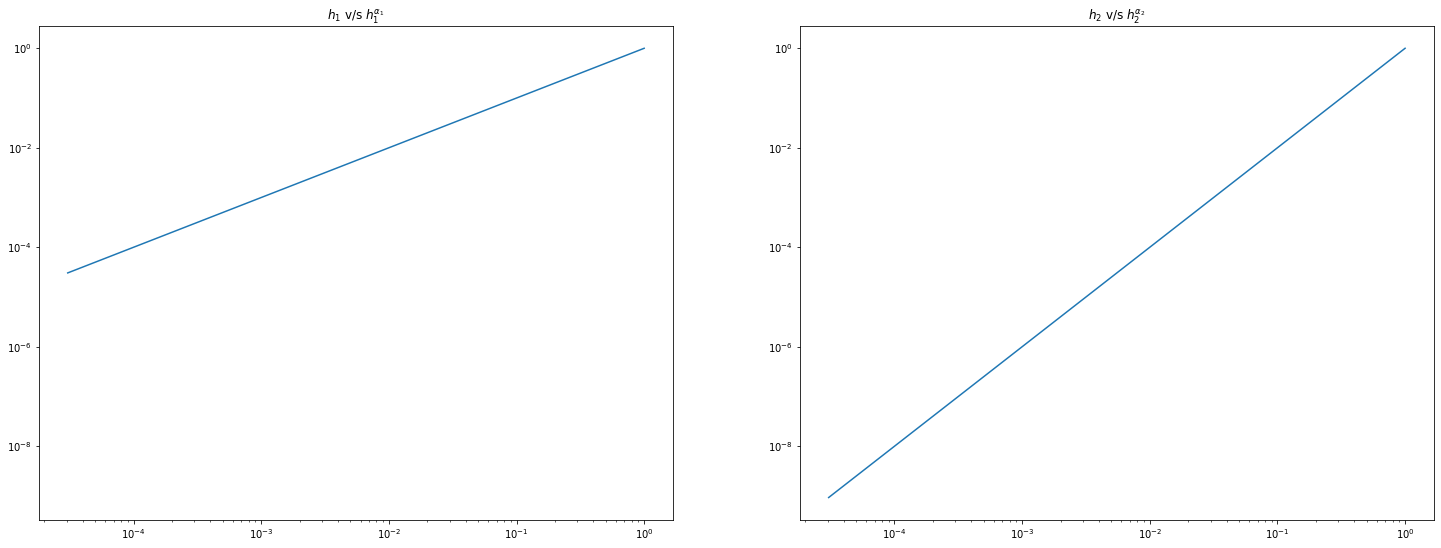

In [24]:
fig = plt.figure(figsize = (25,20))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharex = ax1, sharey = ax1)
ax1.loglog(h_1, h_1**alpha_1r)

ax2.loglog(h_2, h_2**alpha_2r)

ax1.set_title("$h_1$ v/s $h_1^{α_1}$")
ax2.set_title("$h_2$ v/s $h_2^{α_2}$")
plt.show()

Conclusiones: Claramente podemos notar que el segundo método, cuyo orden de convergencia es 2, a medida que el h disminuye, el error disminuye mucho más que para el primer método. Apesar de que intuitivamente la primera gráfica posee una pendiente más pronunciada, se demora mucho más en alcanzar el 0 del eje x (error). Por lo tanto, efectivamente un orden de convergencia 2, es mucho más óptimo que uno de convergencia 1.